# 결정트리(의사결정나무)

[![](https://velog.velcdn.com/images%2Fdbj2000%2Fpost%2F9899931f-a1f1-4c00-bbbb-89d4834e1105%2Fimage.png)](https://velog.io/@dbj2000/ML%EB%B6%84%EB%A5%98%EC%9D%98-%EA%B0%9C%EC%9A%94%EC%99%80-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC)  

- 규칙노드: 규칙 조건
- 리프노드: 결정된 분류 값
- 서브트리: 새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성


## 정보의 균일도

[![](https://velog.velcdn.com/images%2Fljs7463%2Fpost%2Fb3c74acf-f55d-4d3b-8f24-274d7c9fa60b%2Fbandicam%202021-06-15%2021-42-30-628.jpg)](https://velog.io/@ljs7463/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree%EB%AA%A8%EB%8D%B8Model)  


정보의 균일도를 측정하는 방법은 엔트로피를 이용한 정보이득 지수와 지니 계수가 있다.  
- 엔트로피를 이용한 정보이득: 엔트로피는 주어진 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값(1 - 엔트로피 지수). 결정트리는 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할.
- 지니 계수: 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1에 가까울수록 불평등하다는 의미. 머신러닝에 적용될 때는 지니계수가 낮을 수록 데이터 균일도가 높다는 것으로 해석

파라미터 명|설명
---|---
min_samples_split|샘플이 최소한 몇개 이상이어야 split(하위(잎)노드로 분리)할것인가/클수록 과적합방지, 작을수록 정확하게 분리되어 과적합
min_samples_leaf|(잎) 노드가 되려면 가지고 있어야 할 최소 샘플의 수/ 클수록 과대적합방지, 작을수록 과적합/<br>min_samples_split을 만족해도 min_sample_leaf을 만족하지 않으면 leaf노드가 되지 못함
max_depth|얼마나 깊게 트리를 만들것인가/None이면 최대한 깊게(불순도가 0이 될때까지)/클수록 과적합,작을수록 과적합방지
max_leaf_nodes|최대 몇개 잎 노드가 만들어 질때 까지 split(하위(잎)노드로 분리)할것인가
max_feature|최적의 분할을 위해 고려할 최대 피처개수

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier()

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,
                                                    random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file='tree.dot',
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                impurity=True,
                filled=True)

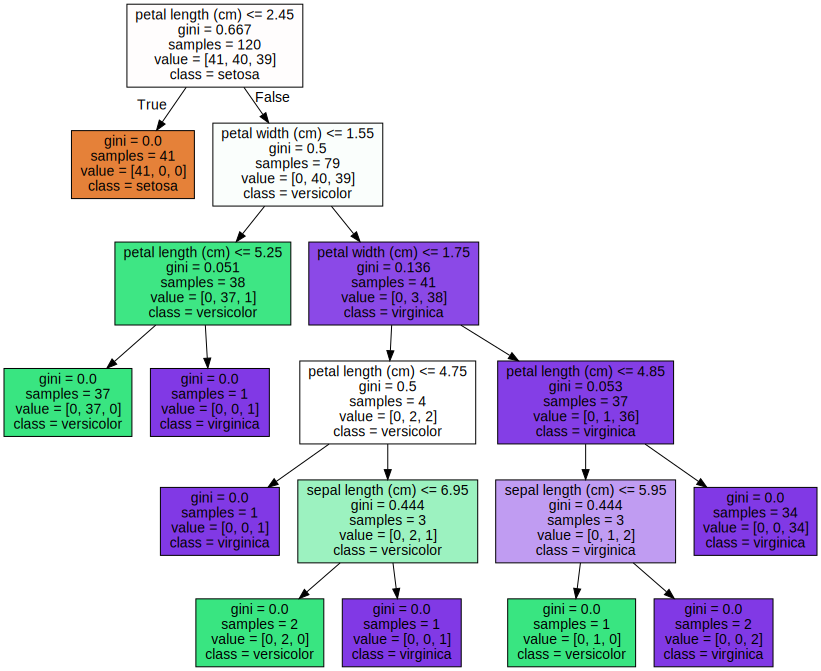

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook 상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_test = dt_clf.predict(X_test)

In [5]:
confusion_matrix(pred_test, y_test)

array([[9, 0, 0],
       [0, 8, 2],
       [0, 2, 9]])

In [6]:
accuracy_score(pred_test, y_test)

0.8666666666666667

Feature importance:
[0.033 0.    0.547 0.42 ]
sepal length (cm) : 0.033
sepal width (cm) : 0.000
petal length (cm) : 0.547
petal width (cm) : 0.420


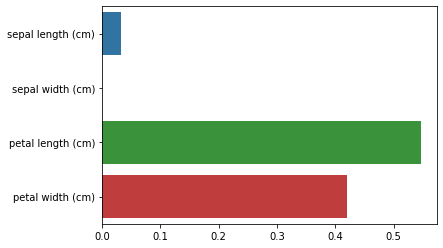

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importance:\n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [8]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

dtree = DecisionTreeClassifier()

### parameters 들을 dictionary 형태로 설정
parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

# param_grid의 하이퍼파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정
### refit=True 가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 train 데이터로 param_grid의 하이퍼파라미터들을 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.675,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.675,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.000,0.950
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.000,0.950
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.925,1.000,0.975
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.925,1.000,0.975


In [9]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

In [10]:
export_graphviz(dt_clf, out_file='best_tree.dot',
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                impurity=True,
                filled=True)

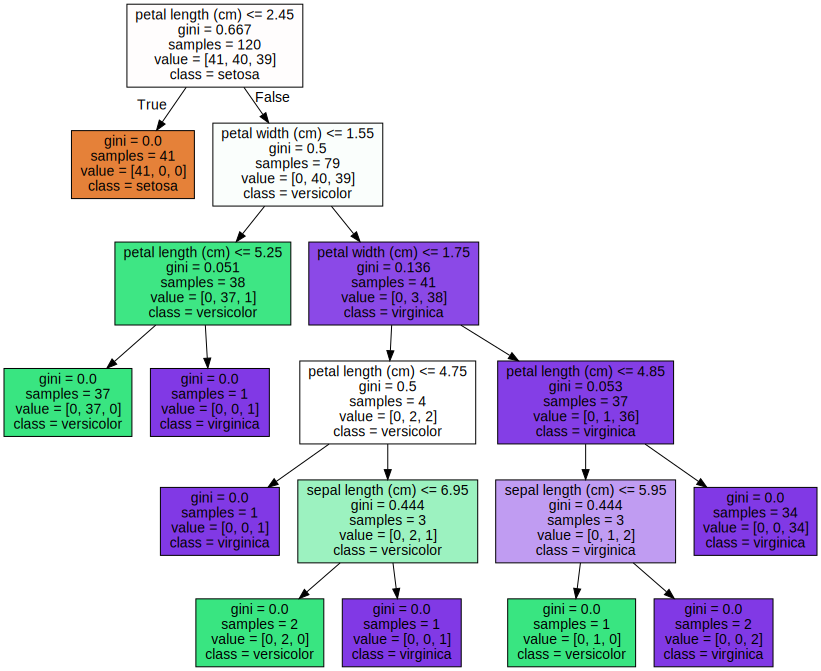

In [11]:
with open('best_tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 결정 트리(Decision TREE) 과적합(Overfitting)

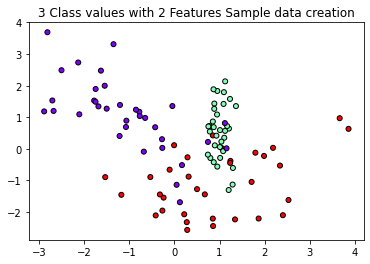

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 feature는 2개,
# 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')

In [13]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    

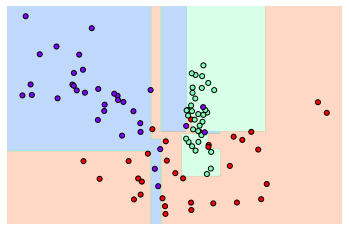

In [15]:
# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

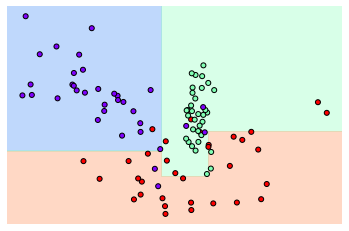

In [16]:
# min_samples_leaf=6 으로 트리 생성조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

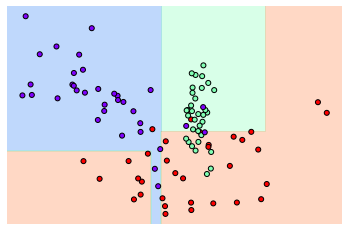

In [19]:
dt_clf = DecisionTreeClassifier(max_depth=3).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

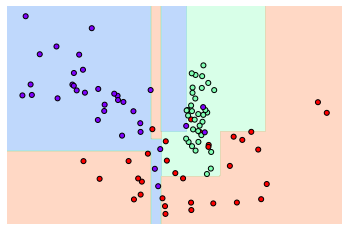

In [20]:
dt_clf = DecisionTreeClassifier(max_depth=4).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)